```
@beelzebruno]
2022
```

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

plt.style.use('seaborn')

# Binary Tree practice list

The goal of this notebook is to complete as many as possible binary tree exercices listed in [this article](https://medium.com/techie-delight/binary-tree-interview-questions-and-practice-problems-439df7e5ea1f).



# 1) Inorder Tree Traversal – Iterative and Recursive

```diff
+ Given a binary tree, write an iterative and recursive solution to traverse the tree using inorder traversal in C++, Java, or* Python.
```

Unlike linked lists, one-dimensional arrays, and other linear data structures, which are traversed in linear order, trees can be traversed in multiple ways in depth–first order (preorder, inorder, and postorder) or breadth–first order (level order traversal). Beyond these basic traversals, various more complex or hybrid schemes are possible, such as depth-limited searches like iterative deepening depth–first search. In this post, inorder tree traversal is discussed in detail.
 
<br />
 
Traversing a tree involves iterating over all nodes in some manner. As the tree is not a linear data structure, there can be more than one possible next node from a given node, so some nodes must be deferred, i.e., stored in some way for later visiting. The traversal can be done iteratively where the deferred nodes are stored in the stack, or it can be done by recursion, where the deferred nodes are stored implicitly in the call stack.

<br />

For traversing a (non-empty) binary tree in an inorder fashion, we must do these three things for every node `n` starting from the tree’s root:

- **(L)** Recursively traverse its left subtree. When this step is finished, we are back at `n` again.
- **(N)** Process `n` itself.
- **(R)** Recursively traverse its right subtree. When this step is finished, we are back at `n` again.

<br />
 
In normal inorder traversal, we visit the left subtree before the right subtree. If we visit the right subtree before visiting the left subtree, it is referred to as reverse inorder traversal.

![picture1](https://www.techiedelight.com/wp-content/uploads/Inorder-Traversal.png)

<hr />

Exercise [source](https://www.techiedelight.com/inorder-tree-traversal-iterative-recursive/)

In [58]:
class Node:
    def __init__(self, value, origin=None, left=None, right=None):
        self.value = value
        self.origin = origin
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node: {self.value}'

    @property
    def root(self):
        return self.origin is None

    def __len__(self):
        left_length = len(self.left) if self.left is not None else 0
        right_length = len(self.right) if self.right is not None else 0
        return 1 + left_length + right_length
    
class Tree:
    def __init__(self, root):
        self.root = root

    def __len__(self):
        return len(self.root)


class Probe:
    """
    Probe agent to explore a binary Tree.
    """
    def __init__(self, tree, start_node=None):
        self.tree = tree
        self.current_position = start_node or tree.root
        self.started_at = self.current_position
        self.buffer = []
        self.effort = 0

    def __repr__(self):
        return f'Probe agent at node: {self.current_position}'

    def reset(self):
        self.buffer = []
        self.current_position = self.start_at
        self.effort = 0
    
    def recursive_inorder(self, node):
        if node is None:
            return []

        self.effort += 1
        self.recursive_inorder(node.left)
        self.buffer.append(node.value)
        self.current_position = node
        self.recursive_inorder(node.right)

        return self.buffer, self.effort
    
    def iterative_inorder(self, node=None):
        heap = []
        node = node or self.current_position
        while heap or node is not None:
            if node is not None:
                heap.append(node)
                node = node.left
            else:
                node = heap.pop(-1)
                self.buffer.append(node.value)
                self.current_position = node
                node = node.right
            self.effort += 1

        return self.buffer, self.effort

In [162]:
# Driver code
root = Node(1)
root.left = Node(2, origin=root)
root.right = Node(3, origin=root)
root.left.left = Node(4, origin=root.left)
root.right.left = Node(5, origin=root.right)
root.right.right = Node(6, origin=root.right)
root.right.left.left = Node(7, origin=root.right.left)
root.right.left.right = Node(8, origin=root.right.left)
tree = Tree(root)

In [166]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    probe = Probe(tree, node)
    rows.append([node, len(node)] + list(probe.recursive_inorder(node)))
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

recursive_df = pd.DataFrame(rows, columns=['Root', 'Node length', 'Result', 'Effort'])
recursive_df

,Root,Node length,Result,Effort
0,Node: 1,8,"[4, 2, 1, 7, 5, 8, 3, 6]",8
1,Node: 2,2,"[4, 2]",2
2,Node: 3,5,"[7, 5, 8, 3, 6]",5
3,Node: 4,1,[4],1
4,Node: 5,3,"[7, 5, 8]",3
5,Node: 6,1,[6],1
6,Node: 7,1,[7],1
7,Node: 8,1,[8],1


In [167]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    probe = Probe(tree, node)
    rows.append([node, len(node)] + list(probe.iterative_inorder(node)))
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

iterative_df = pd.DataFrame(rows, columns=['Root', 'Node length', 'Result', 'Effort'])
iterative_df

,Root,Node length,Result,Effort
0,Node: 1,8,"[4, 2, 1, 7, 5, 8, 3, 6]",16
1,Node: 2,2,"[4, 2]",4
2,Node: 3,5,"[7, 5, 8, 3, 6]",10
3,Node: 4,1,[4],2
4,Node: 5,3,"[7, 5, 8]",6
5,Node: 6,1,[6],2
6,Node: 7,1,[7],2
7,Node: 8,1,[8],2


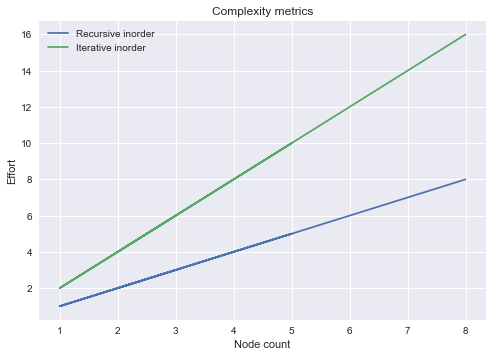

In [170]:
plt.plot(
    recursive_df['Node length'].values,
    recursive_df.Effort.values,
    label='Recursive inorder'
)
plt.plot(
    iterative_df['Node length'].values,
    iterative_df.Effort.values,
    label='Iterative inorder'
)
plt.xlabel('Node count')
plt.ylabel('Effort')
plt.legend()
plt.title('Complexity metrics')
plt.show()

The complexity identified for recursive method worst case is **O(n)** (Linear) since the effort is equivalent to total nodes to explore by a starting point and its better seems to be **O(1)** for trees with a single node.

<br />

The complexity identified for iterative method worst case is **O(2n)** since the effort is equivalent to the double of total nodes to explore by a starting point.

<hr />

# 2) Preorder Tree Traversal – Iterative and Recursive

For traversing a (non-empty) binary tree in a preorder fashion, we must do these three things for every node n starting from the tree’s root:

- (N) Process n itself.
- (L) Recursively traverse its left subtree. When this step is finished, we are back at n again.
- (R) Recursively traverse its right subtree. When this step is finished, we are back at n again.
 
In normal preorder traversal, visit the left subtree before the right subtree. If we visit the right subtree before visiting the left subtree, it is referred to as reverse preorder traversal.

![picture2](https://www.techiedelight.com/wp-content/uploads/Preorder-Traversal.png)

<hr />

Exercise [source](https://www.techiedelight.com/preorder-tree-traversal-iterative-recursive/)

In [59]:
class Node:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node: {self.value}'


class Tree:
    def __init__(self, root):
        self.root = root


class Explorer:
    def __init__(self, tree, start_position=None):
        self.tree = tree
        self.current_position = start_position or self.tree.root
        self.buffer = []
        self.effort = 0
        
    def recursive_preorder(self, node):

        if not node:
            return

        self.buffer.append(node.value)
        self.effort += 1
        self.recursive_preorder(node.left)
        self.recursive_preorder(node.right)

        return self.buffer

    def iterative_preorder(self, node):
        heap = [node]

        while heap or node is not None:
            node = heap.pop(-1)
            self.effort += 1

            if node is None:
                continue

            self.buffer.append(node.value)
            heap.append(node.right)
            heap.append(node.left)

        return self.buffer

        
    

In [17]:
# Driver code
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.right.left = Node(5)
root.right.right = Node(6)
root.right.left.left = Node(7)
root.right.left.right = Node(8)
tree = Tree(root)

In [18]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    explorer = Explorer(tree, node)
    rows.append([node, explorer.recursive_preorder(node), explorer.effort])
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

recursive_df = pd.DataFrame(rows, columns=['Root', 'Result', 'Effort'])
recursive_df

,Root,Result,Effort
0,Node: 1,"[1, 2, 4, 3, 5, 7, 8, 6]",8
1,Node: 2,"[2, 4]",2
2,Node: 3,"[3, 5, 7, 8, 6]",5
3,Node: 4,[4],1
4,Node: 5,"[5, 7, 8]",3
5,Node: 6,[6],1
6,Node: 7,[7],1
7,Node: 8,[8],1


In [19]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    xplorer = Explorer(tree, node)
    rows.append([node, explorer.iterative_preorder(node), explorer.effort])
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

iterative_df = pd.DataFrame(rows, columns=['Root', 'Result', 'Effort'])
iterative_df

,Root,Result,Effort
0,Node: 1,"[1, 2, 4, 3, 5, 7, 8, 6]",17
1,Node: 2,"[2, 4]",5
2,Node: 3,"[3, 5, 7, 8, 6]",11
3,Node: 4,[4],3
4,Node: 5,"[5, 7, 8]",7
5,Node: 6,[6],3
6,Node: 7,[7],3
7,Node: 8,[8],3


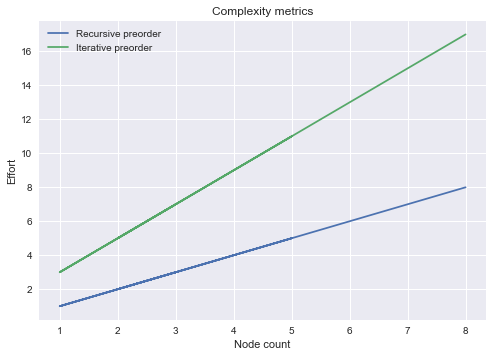

In [22]:
plt.plot(
    [len(result) for result in recursive_df.Result.values],
    recursive_df.Effort.values,
    label='Recursive preorder'
)
plt.plot(
    [len(result) for result in iterative_df.Result.values],
    iterative_df.Effort.values,
    label='Iterative preorder'
)
plt.xlabel('Node count')
plt.ylabel('Effort')
plt.legend()
plt.title('Complexity metrics')
plt.show()

# 3) Postorder Tree Traversal – Iterative and Recursive

For traversing a (non-empty) binary tree in a postorder fashion, we must do these three things for every node n starting from the tree’s root:

- (L) Recursively traverse its left subtree. When this step is finished, we are back at n again.
- (R) Recursively traverse its right subtree. When this step is finished, we are back at n again.
- (N) Process n itself.
 
In normal postorder traversal, visit the left subtree before the right subtree. If we visit the right subtree before visiting the left subtree, it is referred to as reverse postorder traversal.

![Picture3](https://www.techiedelight.com/wp-content/uploads/Postorder-Traversal.png)


In [54]:
class Node:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node: {self.value}'


class Tree:
    def __init__(self, root):
        self.root = root


class Agent:
    def __init__(self, tree, start_position):
        self.tree = tree
        self.current_position = start_position
        self.effort = 0
        self.buffer = []

    def recursive_postorder(self, node):
        if node is None:
            return

        self.effort += 1
        self.recursive_postorder(node.left)
        self.recursive_postorder(node.right)
        self.current_position = node
        self.buffer.append(self.current_position.value)

        return self.buffer

    def iterative_postorder(self, node):
        heap = [node]
        control = []

        while heap:
            self.effort += 1
            node = heap.pop(-1)
            control.append(node)

            if node.left is not None:
                heap.append(node.left)

            if node.right is not None:
                heap.append(node.right)

        while control:
            self.effort += 1
            node = control.pop(-1)
            self.current_position = node
            self.buffer.append(node.value)

        return self.buffer


In [55]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    agent = Agent(tree, node)
    rows.append([node, agent.recursive_postorder(node), agent.effort])
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

recursive_df = pd.DataFrame(rows, columns=['Root', 'Result', 'Effort'])
recursive_df

,Root,Result,Effort
0,Node: 1,"[4, 2, 7, 8, 5, 6, 3, 1]",8
1,Node: 2,"[4, 2]",2
2,Node: 3,"[7, 8, 5, 6, 3]",5
3,Node: 4,[4],1
4,Node: 5,"[7, 8, 5]",3
5,Node: 6,[6],1
6,Node: 7,[7],1
7,Node: 8,[8],1


In [56]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    agent = Agent(tree, node)
    rows.append([node, agent.iterative_postorder(node), agent.effort])
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

iterative_df = pd.DataFrame(rows, columns=['Root', 'Result', 'Effort'])
iterative_df

,Root,Result,Effort
0,Node: 1,"[4, 2, 7, 8, 5, 6, 3, 1]",16
1,Node: 2,"[4, 2]",4
2,Node: 3,"[7, 8, 5, 6, 3]",10
3,Node: 4,[4],2
4,Node: 5,"[7, 8, 5]",6
5,Node: 6,[6],2
6,Node: 7,[7],2
7,Node: 8,[8],2


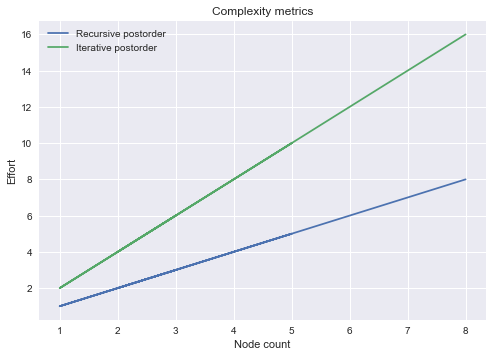

In [57]:
plt.plot(
    [len(result) for result in recursive_df.Result.values],
    recursive_df.Effort.values,
    label='Recursive postorder'
)
plt.plot(
    [len(result) for result in iterative_df.Result.values],
    iterative_df.Effort.values,
    label='Iterative postorder'
)
plt.xlabel('Node count')
plt.ylabel('Effort')
plt.legend()
plt.title('Complexity metrics')
plt.show()

# 4) Check if two binary trees are identical or not – Iterative and Recursive

Write an efficient algorithm to check if two binary trees are identical or not. Two binary trees are identical if they have identical structure and their contents are also the same.

**Input**:

```
           1                        1
        /     \                  /     \
       2       3                2       3
     /   \   /   \            /   \   /   \
    4     5 6     7          4     5 6     7
```


**Output**: True

Explanation: Both binary trees have the same structure and contents.

<hr />



**Input**:

```
           1                        1
        /     \                  /     \
       2       3                2       3
     /   \   /   \            /   \   /
    4     5 6     7          4     5 6
```


**Output**: False

Explanation: Both binary trees have different structures.
 

**Input**:

```
           1                        1
        /     \                  /     \
       2       3                2       3
     /   \   /   \            /   \   /   \
    4     5 6     7          4     5 6     8
```

**Output**: False

Explanation: Both binary trees have the same structure but differ in nodes’ values.


<hr />

[Source](https://www.techiedelight.com/check-if-two-binary-trees-are-identical-not-iterative-recursive/)

In [85]:
class Node:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node: {self.value}'


class RecursionTree:
    def __init__(self, root):
        self.root = root

    def __repr__(self):
        return ' '.join(str(i) for i in self.structure(self.root, []))

    def structure(self, node, buffer):
        if node is None:
            return buffer

        buffer.append(node.value)
        buffer = self.structure(node.left, buffer)
        buffer = self.structure(node.right, buffer)
        return buffer

    def __eq__(self, other):
        return self.structure(self.root, []) == other.structure(other.root, [])



In [98]:
# Driver code
def link_nodes(vector):
    node = Node(vector.pop(0))
    root = node
    
    while vector:
        if node.left is None:
            node.left = Node(vector.pop(0))

        if vector and node.right is None:
            node.right = Node(vector.pop(0))

        node = node.left

    return root


In [99]:
tree_1 = RecursionTree(link_nodes([1, 2, 3, 4, 5, 6, 7]))
tree_2 = RecursionTree(link_nodes([1, 2, 3, 4, 5, 6, 7]))
tree_3 = RecursionTree(link_nodes([1, 2, 3, 4, 5, 6]))
tree_4 = RecursionTree(link_nodes([1, 2, 3, 4, 5, 6, 8]))

In [100]:
results = []
inputs = [
    (tree_1, tree_2),
    (tree_1, tree_3),
    (tree_1, tree_4)
]
for test in inputs:
    a, b = test
    results.append([a, b , a == b])

pd.DataFrame(results, columns=['Tree A', 'Tree B', 'IsEqual'])

,Tree A,Tree B,IsEqual
0,1 2 4 6 7 5 3,1 2 4 6 7 5 3,True
1,1 2 4 6 7 5 3,1 2 4 6 5 3,False
2,1 2 4 6 7 5 3,1 2 4 6 8 5 3,False


# 5) Print bottom view of a binary tree


Given a binary tree, print the bottom view of it. Assume the left and right child of a node makes a 45–degree angle with the parent.

For example, the bottom view of the following tree is 7, 5, 8, 6:


![picture](https://www.techiedelight.com/wp-content/uploads/Bottom-view-binary-tree.png)

We can easily solve this problem with the help of hashing.

The idea is to create an empty map where each key represents the relative horizontal distance of the node from the root node, and the value in the map maintains a pair containing the node’s value and its level number. Then perform preorder traversal on the tree. Suppose the current node’s level is more than or equal to the maximum level seen so far for the same horizontal distance as the current node’s or current horizontal distance is seen for the first time. In that case, update the value and the level for the current horizontal distance in the map. For each node, recur for its left subtree by decreasing horizontal distance and increasing level by one, and recur for right subtree by increasing both level and horizontal distance by one.


The following figure shows the horizontal distance and level of each node in the above binary tree. The final values in the map will be:

```
(horizontal distance —> (node’s value, node’s level))
-1 —> (7, 4)
 0 —> (5, 3)
 1 —> (8, 4)
 2 —> (6, 3)
```

![picture](https://www.techiedelight.com/wp-content/uploads/Horizontal-distance-vs-Level-Binary-Tree.png)



In [40]:
class Node:
    def __init__(self, value, left=None, right=None, origin=None):
        self.value = value
        self.left = left
        self.right = right
        self.origin = origin

    @property
    def level(self):
        return 1 if self.origin is None else self.origin.level + 1

    @property
    def x_distance(self):
        return self.get_x_distance()

    def get_x_distance(self):
        if self.origin is None:
            return 0
        elif self == self.origin.left:
            return self.origin.x_distance - 1

        return self.origin.x_distance + 1

    def __repr__(self):
        return f'Node: {self.value}'


class Tree:
    def __init__(self, root):
        self.root = root


    def bottom_view(self):
        buffer = {}
        return self.preorder(self.root, buffer)

    def preorder(self, node, buffer):
        if node is None:
            return
        
        if node.x_distance not in buffer:
            buffer[node.x_distance] = (node.value, node.level)
        elif buffer[node.x_distance][1] < node.level:
            buffer[node.x_distance] = (node.value, node.level)

        self.preorder(node.left, buffer)
        self.preorder(node.right, buffer)
        return buffer


In [41]:
# Driver code
root = Node(1)
root.left = Node(2, origin=root)
root.right = Node(3, origin=root)
root.right.right = Node(6, origin=root.right)
root.right.left = Node(5, origin=root.right)
root.right.left.right = Node(8, origin=root.right.left)
root.right.left.left = Node(7, origin=root.right.left)
tree = Tree(root)


In [42]:
rows = []

queue = [tree.root]
while queue:
    node = queue.pop(0)
    if node is None:
        continue
    rows.append([str(node), str(node.left), str(node.right), node.level, node.x_distance])
    queue.append(node.left)
    queue.append(node.right)

pd.DataFrame(rows, columns=['Node', 'Left', 'Right', 'Level', 'X_distance'])

,Node,Left,Right,Level,X_distance
0,Node: 1,Node: 2,Node: 3,1,0
1,Node: 2,None,None,2,-1
2,Node: 3,Node: 5,Node: 6,2,1
3,Node: 5,Node: 7,Node: 8,3,0
4,Node: 6,None,None,3,2
5,Node: 7,None,None,4,-1
6,Node: 8,None,None,4,1


In [47]:
rows = []
for x_distance, data in sorted(tree.bottom_view().items(), key=lambda x: x):
    value, level = data
    rows.append([x_distance, value, level])
pd.DataFrame(rows, columns=['Distance', 'Value', 'Level'])

,Distance,Value,Level
0,-1,7,4
1,0,5,3
2,1,8,4
3,2,6,3
